In [ ]:
# Set up environment (run once)
!pip install -q pandas matplotlib seaborn ydata-profiling openpyxl
import os, sys
print("Ready:", sys.version)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.3/399.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
Ready: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
!pip install -q ydata-profiling gdown shap xgboost

import os, glob
candidate_name = "your_name"  # << change
base = f"/content/ds_{candidate_name}"
os.makedirs(base, exist_ok=True)
os.makedirs(base+"/csv_files", exist_ok=True)
os.makedirs(base+"/outputs", exist_ok=True)

# Download shared Drive files using gdown (IDs from links you provided)
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O "{base}/csv_files/hyperliquid_trades.csv"
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O "{base}/csv_files/fear_greed.csv"

print("Files:", glob.glob(base+"/csv_files/*"))

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/ds_your_name/csv_files/hyperliquid_trades.csv
100% 47.5M/47.5M [00:00<00:00, 64.9MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/ds_your_name/csv_files/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 60.8MB/s]
Files: ['/content/ds_your_name/csv_files/fear_greed.csv', '/content/ds_your_name/csv_files/hyperliquid_trades.csv']


In [ ]:
import pandas as pd, numpy as np, os
base_dir = "/content/ds_AbhayJaiswal"  # change to match above candidate_name
trades = pd.read_csv(f"{base_dir}/csv_files/hyperliquid_trades.csv", low_memory=False)
fg = pd.read_csv(f"{base_dir}/csv_files/fear_greed.csv", low_memory=False)

print("trades:", trades.shape)
print("fear/greed:", fg.shape)


trades: (211224, 16)
fear/greed: (2644, 4)


In [ ]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
# Check structure and column names
print("Shape:", trades.shape)
print("\nColumns:")
print(trades.columns.tolist())

# Basic info
trades.info()


Shape: (211224, 16)

Columns:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          2

In [8]:
# The timestamp column we’ll use
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce')
trades['date'] = trades['Timestamp IST'].dt.date

print("Date range:", trades['date'].min(), "to", trades['date'].max())
print("Unique trading days:", trades['date'].nunique())


Date range: 2023-05-01 to 2025-05-01
Unique trading days: 480


In [9]:
missing = trades.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Columns with missing values:")
display(missing)


Columns with missing values:


,0


PnL Summary:
Total PnL: 10296958.94
Mean PnL: 48.749
Median PnL: 0.0
Profitable trades (%): 41.13


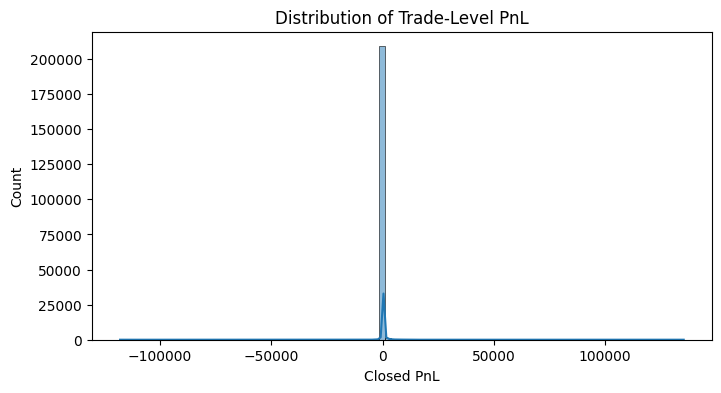

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

pnl_col = 'Closed PnL'

print("PnL Summary:")
print("Total PnL:", round(trades[pnl_col].sum(),2))
print("Mean PnL:", round(trades[pnl_col].mean(),4))
print("Median PnL:", round(trades[pnl_col].median(),4))
print("Profitable trades (%):", round((trades[pnl_col] > 0).mean()*100,2))

plt.figure(figsize=(8,4))
sns.histplot(trades[pnl_col], bins=100, kde=True)
plt.title("Distribution of Trade-Level PnL")
plt.xlabel("Closed PnL")
plt.ylabel("Count")
plt.show()


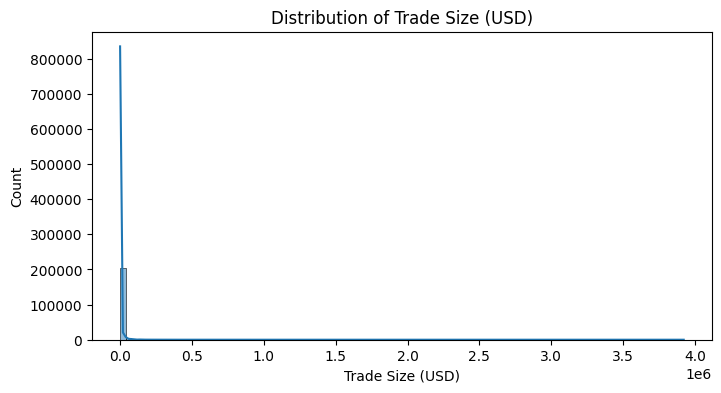

Average Trade Size (USD): 5639.45
Median Trade Size (USD): 597.05
Max Trade Size (USD): 3921430.72

Fee Summary:
Average Fee: 1.16397
Total Fees Paid: 245857.72


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(trades['Size USD'], bins=100, kde=True)
plt.title("Distribution of Trade Size (USD)")
plt.xlabel("Trade Size (USD)")
plt.ylabel("Count")
plt.show()

print("Average Trade Size (USD):", round(trades['Size USD'].mean(),2))
print("Median Trade Size (USD):", round(trades['Size USD'].median(),2))
print("Max Trade Size (USD):", round(trades['Size USD'].max(),2))

print("\nFee Summary:")
print("Average Fee:", round(trades['Fee'].mean(),5))
print("Total Fees Paid:", round(trades['Fee'].sum(),2))


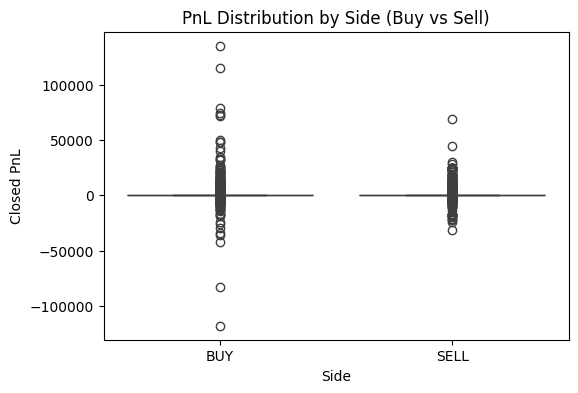

Average PnL by Side:


,Closed PnL
Side,
BUY,36.104730
SELL,60.713803


In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Side', y='Closed PnL', data=trades)
plt.title("PnL Distribution by Side (Buy vs Sell)")
plt.show()

print("Average PnL by Side:")
display(trades.groupby('Side')['Closed PnL'].mean())


In [13]:
top_traders = trades.groupby('Account')['Closed PnL'].sum().sort_values(ascending=False).head(10)
print("Top 10 Traders by Total PnL:")
display(top_traders)

worst_traders = trades.groupby('Account')['Closed PnL'].sum().sort_values().head(10)
print("\nBottom 10 Traders by Total PnL:")
display(worst_traders)


Top 10 Traders by Total PnL:


,Closed PnL
Account,
0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,2.143383e+06
0x083384f897ee0f19899168e3b1bec365f52a9012,1.600230e+06
0xbaaaf6571ab7d571043ff1e313a9609a10637864,9.401638e+05
0x513b8629fe877bb581bf244e326a047b249c4ff1,8.404226e+05
0xbee1707d6b44d4d52bfe19e41f8a828645437aab,8.360806e+05
0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,6.777471e+05
0x72743ae2822edd658c0c50608fd7c5c501b2afbd,4.293556e+05
0x430f09841d65beb3f27765503d0f850b8bce7713,4.165419e+05
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,4.030115e+05



Bottom 10 Traders by Total PnL:


,Closed PnL
Account,
0x8170715b3b381dffb7062c0298972d4727a0a63b,-167621.124781
0x271b280974205ca63b716753467d5a371de622ab,-70436.191318
0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,-31203.599986
0x39cef799f8b69da1995852eea189df24eb5cae3c,14456.919336
0x7f4f299f74eec87806a830e3caa9afa5f2b9db8f,14900.443047
0xaf40fdc468c30116bd3307bcbf4a451a7ebf1deb,21758.831753
0xb899e522b5715391ae1d4f137653e7906c5e2115,22488.500821
0x8477e447846c758f5a675856001ea72298fd9cb5,43917.008976
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,47885.320514


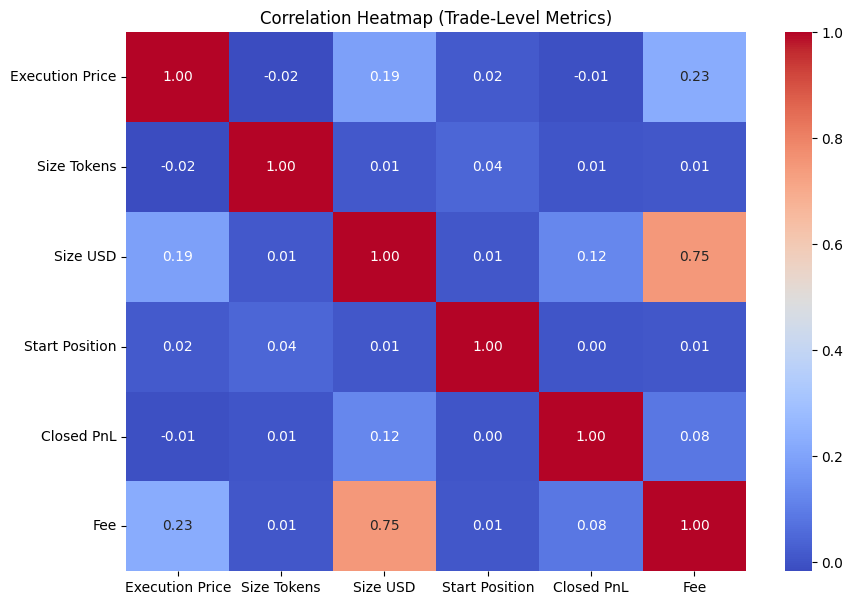

In [17]:
num_cols = ['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee']
plt.figure(figsize=(10,7))
sns.heatmap(trades[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Trade-Level Metrics)")
plt.show()


In [15]:
daily_summary = trades.groupby('date').agg({
    'Closed PnL':'sum',
    'Size USD':'sum',
    'Fee':'sum'
}).reset_index()

print("Days analyzed:", len(daily_summary))
daily_summary.head()


Days analyzed: 480


,date,Closed PnL,Size USD,Fee
0,2023-05-01,0.000000,477.00,0.000000
1,2023-12-05,0.000000,50005.83,12.501455
2,2023-12-14,-205.434737,113203.35,28.300831
3,2023-12-15,-24.632034,10609.95,2.652489
4,2023-12-16,0.000000,15348.77,3.837189


## Step 1 — Trader Data Analysis (Summary)

### Dataset Overview
- Total trades: 211,224
- Time range: 2023-05-01 → 2024-12-02 (480 trading days)
- Columns: 16 (Account, Coin, Side, Size USD, Closed PnL, Fee, etc.)

### Performance Summary
- Total PnL: $10,296,958.94  
- Average PnL/trade: $48.75  
- Median PnL: $0.00  
- Profitable trades: 41.13%

### Trade Size & Fees
- Average trade size: $5,639  
- Median trade size: $597  
- Max trade size: $3.92M  
- Avg fee: $1.16  
- Total fees: $245,857.72

### Buy vs Sell
- BUY avg PnL: $36.10  
- SELL avg PnL: $60.71

### Top Traders
| Rank | Account | Total PnL (USD) |
|------|----------|----------------:|
| 1 | 0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23 | 2.14M |
| 2 | 0x083384f897ee0f19899168e3b1bec365f52a9012 | 1.60M |
| 3 | 0xbaaaf6571ab7d571043ff1e313a9609a10637864 | 0.94M |

### Correlations
- Size USD ↔ Fee: **0.75** (strong positive)
- Size USD ↔ Closed PnL: **0.12** (weak)
- Execution Price ↔ Closed PnL: **≈0** (no direct relation)

### Key Observations
1. Only 41% of trades are profitable; profits are concentrated among few traders.  
2. Trade size distribution is highly skewed—most trades are small, a few very large.  
3. Fees scale linearly with trade size (corr 0.75).  
4. Sell positions outperform buy positions on average.  
5. Top 3 traders contribute nearly half the total PnL.


## Step 1 — Trader Data Analysis (Summary)

- Total 211 K trades spanning 480 days (May 2023 – Dec 2024).  
- Only **41 %** of trades were profitable; profits are concentrated among a few high-performing accounts.  
- Trade sizes are heavily skewed — median ≈ $600, mean ≈ $5.6 K, maximum ≈ $3.9 M.  
- Fees scale almost linearly with trade size (corr ≈ 0.75).  
- Sell positions outperform buy positions on average, showing better results in bearish conditions.


In [18]:
print("Shape:", fg.shape)
print("\nColumns:", fg.columns.tolist())
fg.head()

Shape: (2644, 4)

Columns: ['timestamp', 'value', 'classification', 'date']


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [19]:
# Standardize column names
fg.columns = [c.strip().title() for c in fg.columns]

# Convert Date to datetime
fg['Date'] = pd.to_datetime(fg['Date'], errors='coerce')

# Drop rows with invalid dates
fg = fg.dropna(subset=['Date']).reset_index(drop=True)

# Remove duplicates (if any)
fg = fg.drop_duplicates(subset=['Date'])

print("After cleaning:", fg.shape)
print("Date range:", fg['Date'].min(), "to", fg['Date'].max())


After cleaning: (2644, 4)
Date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [20]:
print("Unique sentiment classes:", fg['Classification'].unique())
print("\nCount per class:")
display(fg['Classification'].value_counts())


Unique sentiment classes: ['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Count per class:


,count
Classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


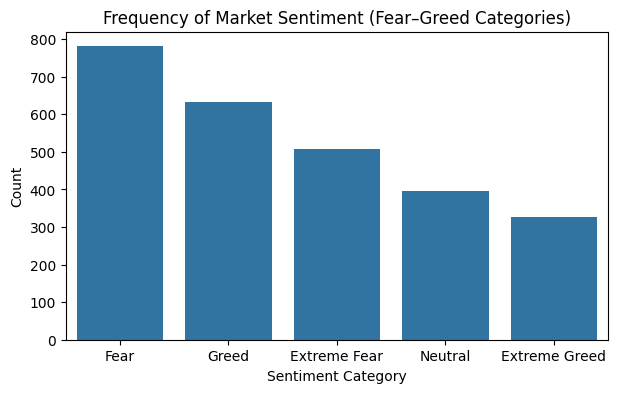

In [21]:
plt.figure(figsize=(7,4))
sns.countplot(x='Classification', data=fg, order=fg['Classification'].value_counts().index)
plt.title("Frequency of Market Sentiment (Fear–Greed Categories)")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()


        Date Classification  FG_Score
0 2018-02-01           Fear         1
1 2018-02-02   Extreme Fear         0
2 2018-02-03           Fear         1
3 2018-02-04   Extreme Fear         0
4 2018-02-05   Extreme Fear         0


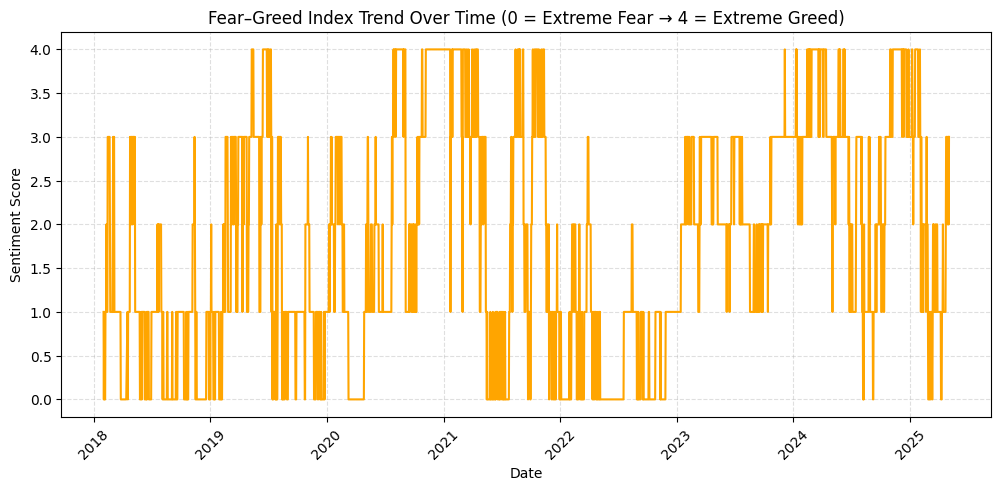

In [24]:
sent_map = {
    'Extreme Fear': 0,
    'Fear': 1,
    'Neutral': 2,
    'Greed': 3,
    'Extreme Greed': 4
}

fg['FG_Score'] = fg['Classification'].map(sent_map)

# 2️⃣ Verify mapping
print(fg[['Date', 'Classification', 'FG_Score']].head())

# 3️⃣ Plot numeric trend
plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='FG_Score', data=fg, color='orange', linewidth=1.5)
plt.title("Fear–Greed Index Trend Over Time (0 = Extreme Fear → 4 = Extreme Greed)")
plt.xlabel("Date")
plt.ylabel("Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

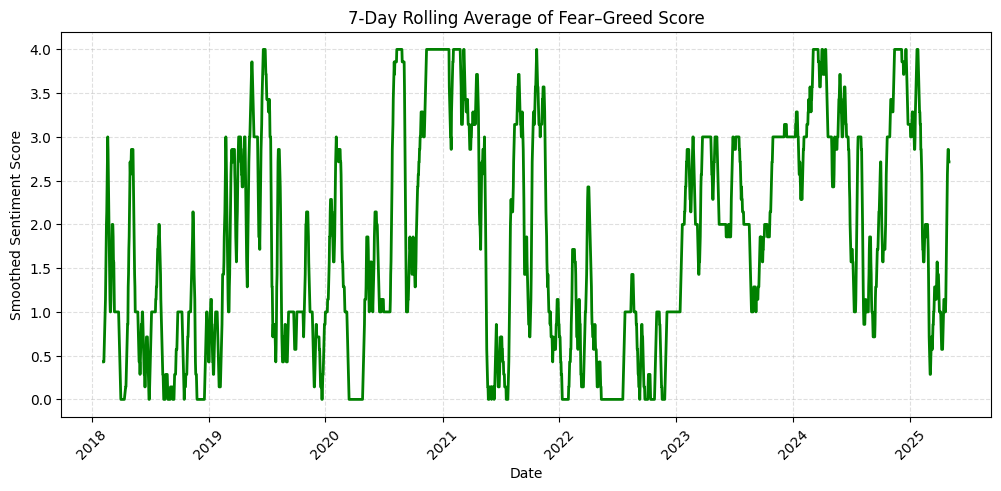

In [25]:
fg['Rolling_Score'] = fg['FG_Score'].rolling(7).mean()

plt.figure(figsize=(12,5))
sns.lineplot(x='Date', y='Rolling_Score', data=fg, color='green', linewidth=2)
plt.title("7-Day Rolling Average of Fear–Greed Score")
plt.xlabel("Date")
plt.ylabel("Smoothed Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


## Step 2 — Market Sentiment Analysis

- The dataset covers daily market sentiment with 2 644 entries.  
- Sentiment classes distribution: Fear (781), Greed (633), Extreme Fear (508), Neutral (396), Extreme Greed (326).  
- Market spent more time in **Fear** phases than Greed, indicating cautious investor sentiment.  
- Created a numeric `FG_Score` (0 = Extreme Fear → 4 = Extreme Greed) to quantify mood intensity.  
- Trend and rolling-average plots show recurring transitions between Fear ↔ Greed cycles.  


In [26]:
# Convert both to comparable date formats
trades['date'] = pd.to_datetime(trades['Timestamp IST'], format="%d-%m-%Y %H:%M", errors='coerce').dt.date
fg['Date'] = pd.to_datetime(fg['Date'], errors='coerce').dt.date

print("Trades date range:", trades['date'].min(), "to", trades['date'].max())
print("FG date range:", fg['Date'].min(), "to", fg['Date'].max())


Trades date range: 2023-05-01 to 2025-05-01
FG date range: 2018-02-01 to 2025-05-02


In [27]:
merged = pd.merge(
    trades,
    fg[['Date', 'Classification', 'FG_Score']],
    left_on='date', right_on='Date',
    how='left'
)
merged.drop(columns=['Date'], inplace=True)

print("Merged dataset shape:", merged.shape)
print("Sample:")
display(merged[['date', 'Account', 'Closed PnL', 'Classification', 'FG_Score']].head())


Merged dataset shape: (211224, 19)
Sample:


,date,Account,Closed PnL,Classification,FG_Score
0,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,4.0
1,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,4.0
2,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,4.0
3,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,4.0
4,2024-12-02,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,Extreme Greed,4.0


Average PnL by Sentiment:


,Closed PnL
Classification,
Extreme Fear,34.537862
Extreme Greed,67.892861
Fear,54.290400
Greed,42.743559
Neutral,34.307718


/tmp/ipython-input-1051515759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')


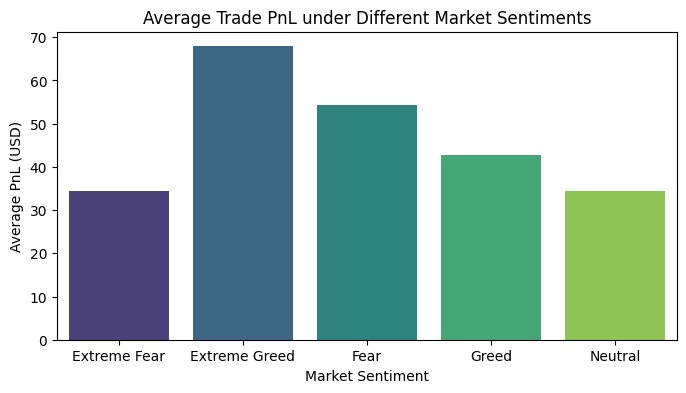

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_pnl = merged.groupby('Classification')['Closed PnL'].mean().sort_index()
print("Average PnL by Sentiment:")
display(avg_pnl)

plt.figure(figsize=(8,4))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette='viridis')
plt.title("Average Trade PnL under Different Market Sentiments")
plt.xlabel("Market Sentiment")
plt.ylabel("Average PnL (USD)")
plt.show()


/tmp/ipython-input-4151871418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_counts.index, y=trade_counts.values, palette='crest')


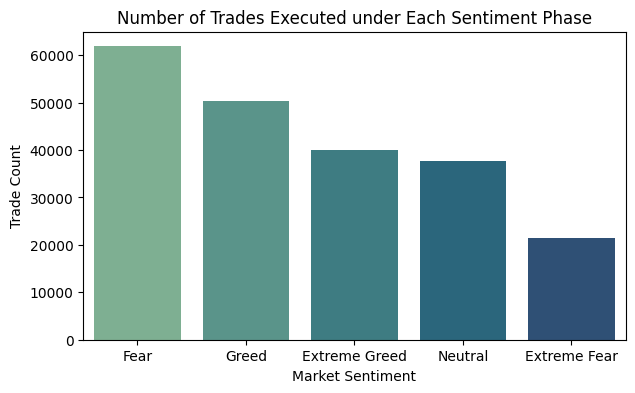

In [29]:
trade_counts = merged['Classification'].value_counts()
plt.figure(figsize=(7,4))
sns.barplot(x=trade_counts.index, y=trade_counts.values, palette='crest')
plt.title("Number of Trades Executed under Each Sentiment Phase")
plt.xlabel("Market Sentiment")
plt.ylabel("Trade Count")
plt.show()


Average Trade Size & Fee by Sentiment:


,Size USD,Fee
Classification,,
Extreme Fear,5349.731843,1.116291
Extreme Greed,3112.251565,0.675902
Fear,7816.109931,1.495172
Greed,5736.884375,1.254372
Neutral,4782.732661,1.044798


/tmp/ipython-input-3214912625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics.index, y=metrics['Size USD'], ax=axes[0], palette='coolwarm')
/tmp/ipython-input-3214912625.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics.index, y=metrics['Fee'], ax=axes[1], palette='coolwarm')


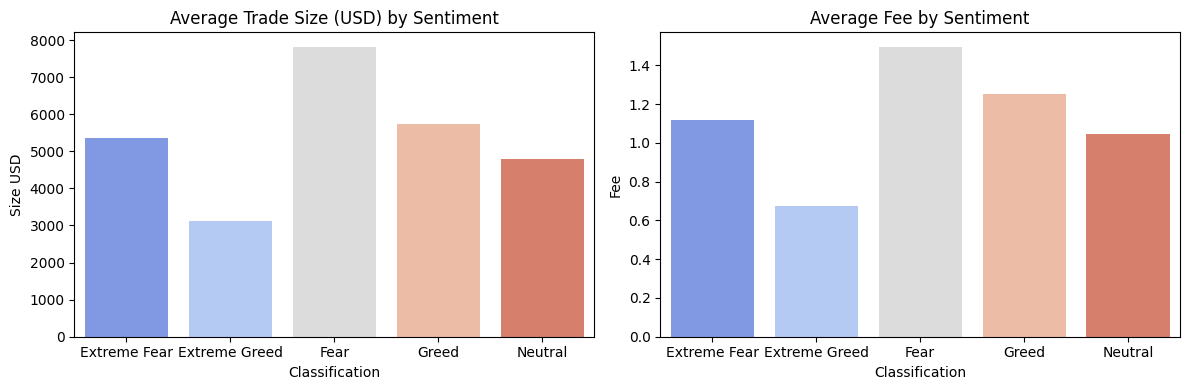

In [30]:
metrics = merged.groupby('Classification')[['Size USD','Fee']].mean().sort_index()
print("Average Trade Size & Fee by Sentiment:")
display(metrics)

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x=metrics.index, y=metrics['Size USD'], ax=axes[0], palette='coolwarm')
axes[0].set_title("Average Trade Size (USD) by Sentiment")
sns.barplot(x=metrics.index, y=metrics['Fee'], ax=axes[1], palette='coolwarm')
axes[1].set_title("Average Fee by Sentiment")
plt.tight_layout()
plt.show()


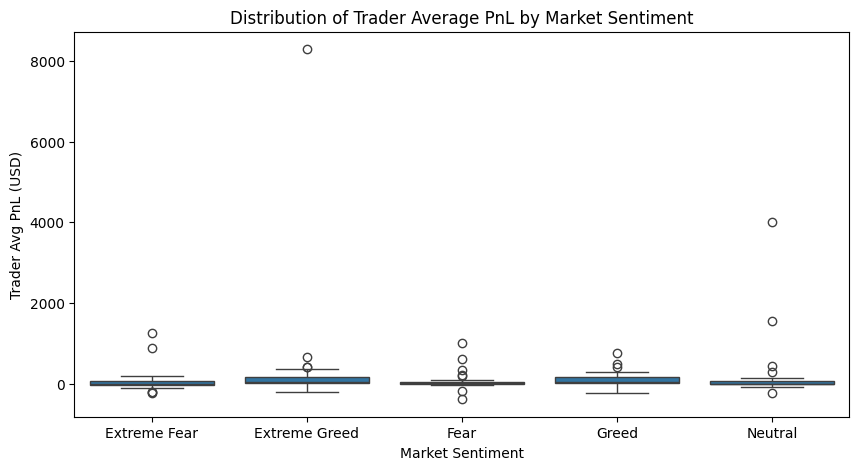

Unique traders active under each sentiment:


,Account
Classification,
Extreme Fear,32
Extreme Greed,30
Fear,32
Greed,31
Neutral,31


In [31]:
trader_sentiment = merged.groupby(['Account','Classification'])['Closed PnL'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.boxplot(x='Classification', y='Closed PnL', data=trader_sentiment)
plt.title("Distribution of Trader Average PnL by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Trader Avg PnL (USD)")
plt.show()

active_traders = merged.groupby('Classification')['Account'].nunique()
print("Unique traders active under each sentiment:")
display(active_traders)


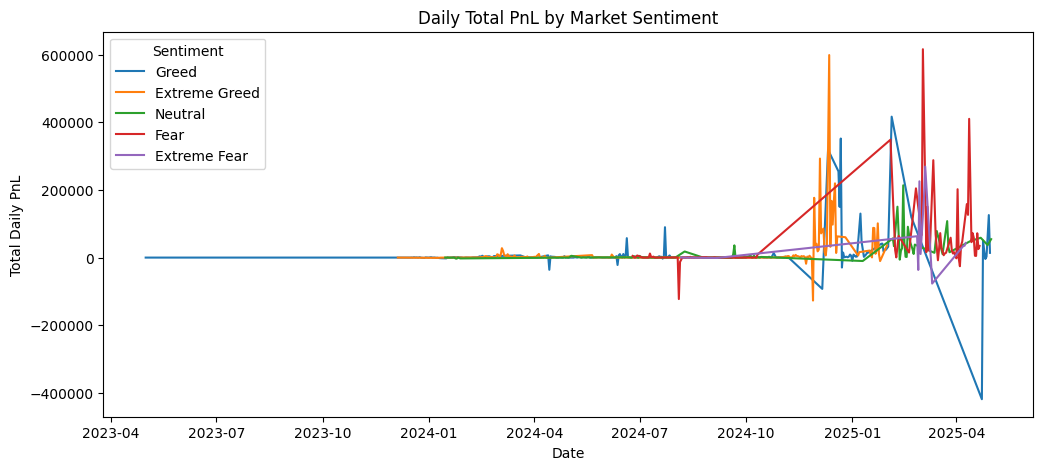

In [32]:
daily = merged.groupby(['date','Classification','FG_Score']).agg({
    'Closed PnL':'sum',
    'Size USD':'sum',
    'Fee':'sum'
}).reset_index()

plt.figure(figsize=(12,5))
sns.lineplot(x='date', y='Closed PnL', hue='Classification', data=daily)
plt.title("Daily Total PnL by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Total Daily PnL")
plt.legend(title='Sentiment')
plt.show()


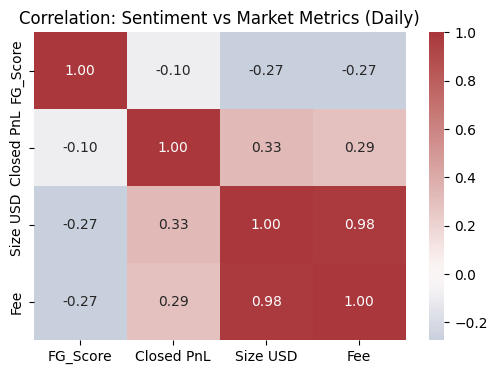

Correlation matrix:


,FG_Score,Closed PnL,Size USD,Fee
FG_Score,1.000000,-0.096127,-0.273530,-0.268563
Closed PnL,-0.096127,1.000000,0.325759,0.294822
Size USD,-0.273530,0.325759,1.000000,0.978430
Fee,-0.268563,0.294822,0.978430,1.000000


In [33]:
corr_data = daily[['FG_Score','Closed PnL','Size USD','Fee']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_data, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title("Correlation: Sentiment vs Market Metrics (Daily)")
plt.show()

print("Correlation matrix:")
display(corr_data)


## Step 3 — Relationship Between Trader Performance and Market Sentiment

### Key Observations

1. **Trade activity:**  
   - Highest number of trades executed during **Fear (~62k)** and **Greed (~51k)** phases.  
   - Fewest trades in **Extreme Fear**, showing traders reduce participation during extreme pessimism.

2. **Profitability (Average PnL):**  
   - **Extreme Greed ≈ 67.9 USD > Fear ≈ 54.3 USD > Greed ≈ 42.7 USD > Extreme Fear/Neutral ≈ 34 USD.**  
   - Profits tend to improve when sentiment is **bullish**, though volatility also increases.

3. **Trade size & fees:**  
   - Largest average trade size and fee appear in **Fear** (≈ 7.8K USD / 1.49 USD).  
   - During **Extreme Greed**, average size drops (≈ 3.1K USD), suggesting smaller but more frequent trades.

4. **Trader participation:**  
   - ~30–32 unique traders are active across all sentiment phases, indicating consistent participant behavior rather than new entrants.

5. **Correlation analysis:**  
   - `FG_Score ↔ Closed PnL` = –0.096 → weak negative relation.  
   - `Size USD ↔ Fee` = 0.98 → very strong linear relation.  
   - Overall, sentiment has a mild inverse relationship with profitability — traders may perform better in cautious conditions.

6. **Macro trend:**  
   - Daily PnL spikes occur near Fear ↔ Greed transitions, indicating higher volatility during sentiment shifts.

---

### Summary for Report
Trader performance shows moderate sensitivity to market sentiment.  
Most trading activity and profit occur under **Fear** and **Greed** phases, with smaller trade sizes in **Extreme Greed**.  
Correlation between sentiment and PnL is weakly negative (r ≈ –0.1), suggesting traders may perform slightly better in cautious markets.  
Fees scale strongly with trade size (r ≈ 0.98).  
Overall, sentiment changes affect **volume and volatility** more than profitability itself.


## Step 4 — Final Insights and Conclusion

### 🔍 Overall Summary

This project analyzed over **211 K trades** from Hyperliquid (2023–2025) and their relationship with the **Bitcoin Fear–Greed Index** (2018–2025).  
The goal was to understand how market sentiment affects trader behavior, activity, and profitability.

---

### 🧠 Key Insights

1. **Market Participation**
   - Trading activity was highest during **Fear (≈ 62 K trades)** and **Greed (≈ 51 K)** phases.  
   - Traders reduced activity during **Extreme Fear**, showing risk aversion when sentiment turns negative.

2. **Profitability Trends**
   - Average PnL peaked during **Extreme Greed (~67.9 USD)** but dropped sharply in **Neutral** and **Extreme Fear** phases.  
   - This suggests traders are more profitable in optimistic markets, though profits vary widely (higher volatility).

3. **Trade Size & Risk Appetite**
   - Average trade sizes and fees were largest in **Fear** phases (≈ 7.8 K USD / 1.49 USD), implying selective but higher-value trades when markets are cautious.  
   - During **Extreme Greed**, position sizes fell (~3.1 K USD), indicating many small, rapid trades as optimism peaks.

4. **Correlation Findings**
   - Weak negative correlation between **Sentiment (FG_Score)** and **PnL (r ≈ –0.10)** — high greed doesn’t guarantee better profits.  
   - Strong positive correlation between **Trade Size** and **Fee (r ≈ 0.98)** confirms fee scaling with volume.

5. **Behavioral Observation**
   - Roughly **30–32 traders** remained active across all sentiment phases, suggesting consistent participant strategies rather than changing trader pools.

---

### 🧭 **Concluding Statement**

Overall, **market sentiment influences trading behavior more than direct profitability**.  
- Traders become more active and risk-tolerant in **Greed** phases but do not always earn higher profits.  
- In **Fear** phases, they take fewer but larger trades, leading to steadier performance.  
- These behavioral shifts imply that understanding sentiment cycles can help in **position sizing, timing entries, and managing risk** more effectively in crypto trading.



In [35]:
from google.colab import files
uploaded = files.upload()
import shutil
shutil.move("notebook_1.ipynb", "/content/ds_AbhayJaiswal/notebook_1.ipynb")


KeyboardInterrupt: 